In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
import matplotlib.pyplot

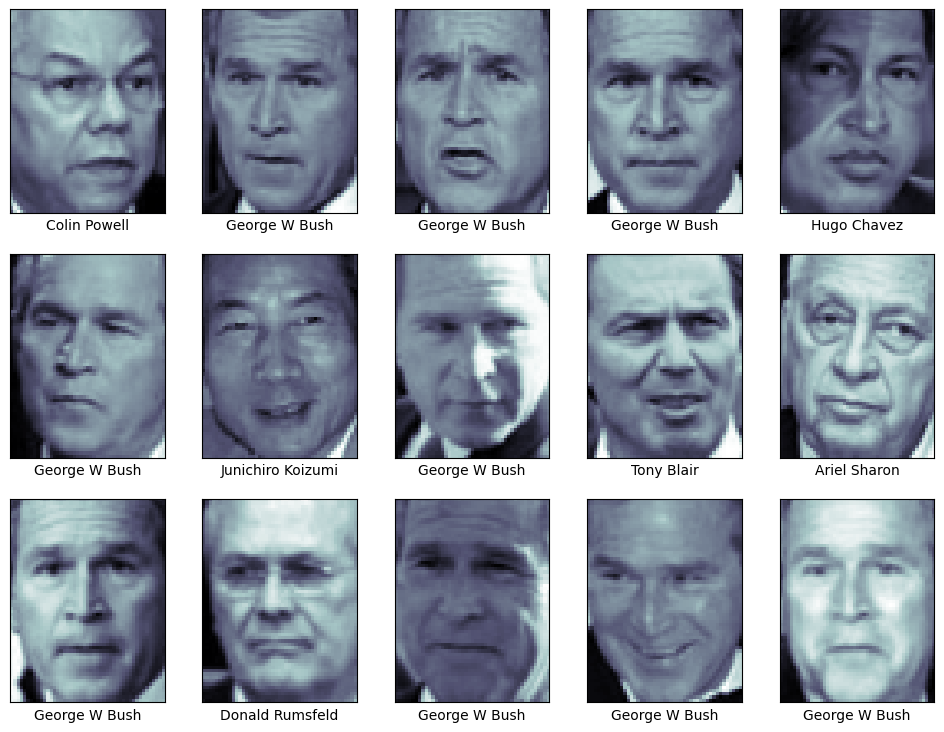

In [18]:
fig, ax = plt.subplots(3,5,figsize=(12,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])


In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [6]:
pca=PCA(n_components=150,svd_solver='randomized',whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [7]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(faces.data,faces.target,random_state=42)


In [8]:
from sklearn.model_selection import GridSearchCV
# Use double underscores to access parameters of estimators within the pipeline
param_grid={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)
%time grid.fit(Xtrain,Ytrain)
print(grid.best_params_)

CPU times: user 1min 30s, sys: 24.7 s, total: 1min 55s
Wall time: 1min 13s
{'svc__C': 5, 'svc__gamma': 0.001}


In [9]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [10]:
grid.fit(Xtrain, Ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            svd_solver='randomized',
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  # Ensure you have a model to work with

# Define the model
model = SVC()

# Define the parameter grid
param_grid = {'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid)

# Fit the model to the training data
%time grid.fit(Xtrain, Ytrain)

# Access the best parameters after fitting
print(grid.best_params_)

CPU times: user 1min 48s, sys: 1.07 s, total: 1min 49s
Wall time: 1min 51s
{'C': 50, 'gamma': 0.0005}


In [13]:
# Import necessary modules for evaluation
from sklearn.metrics import classification_report, confusion_matrix



# Generate classification report
print(classification_report(Ytest, yfit, target_names=faces.target_names))



                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



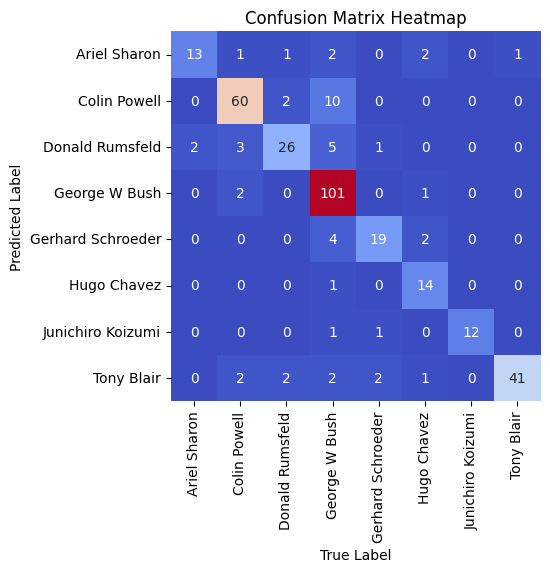

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming Ytest and yfit are defined, and faces.target_names is the list of labels
mat = confusion_matrix(Ytest, yfit)

# Create the heatmap with a different color scheme
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,
            cmap="coolwarm")  # Change this to your preferred colormap

plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
# Calculate and print accuracy and precision
accuracy = accuracy_score(Ytest, yfit)
precision = precision_score(Ytest, yfit, average='weighted')  # Use weighted average for multi-class

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")


Accuracy: 0.85
Precision: 0.86


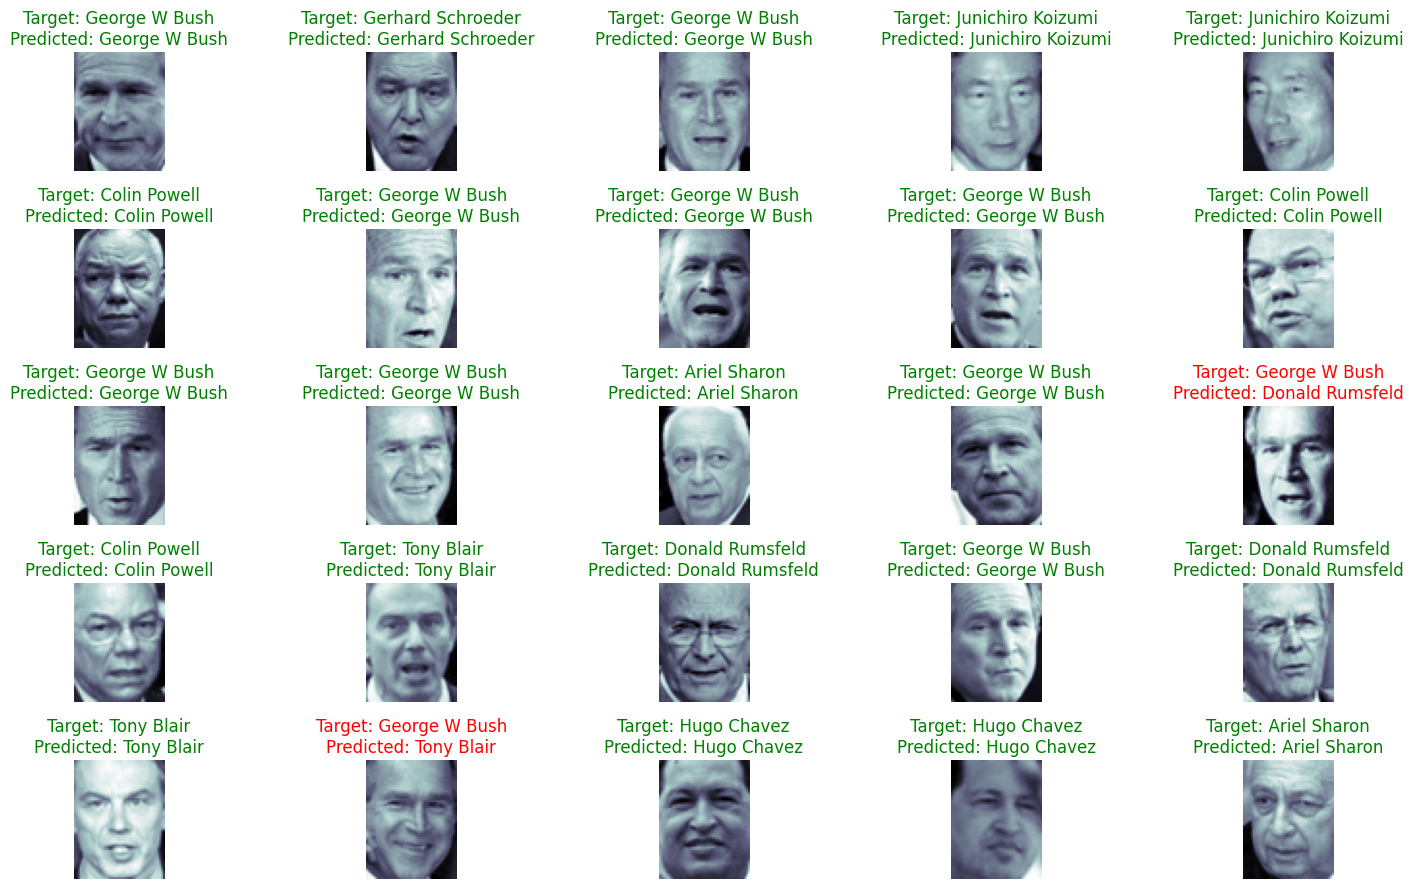

In [19]:
# Display target and predicted values for images in the test set
fig, axes = plt.subplots(5, 5, figsize=(16, 9))  # Adjust the number of rows/columns as needed
for i, ax in enumerate(axes.flat):
    if i < len(Xtest):
        ax.imshow(Xtest[i].reshape(faces.images[0].shape), cmap='bone')
        target_name = faces.target_names[Ytest[i]]
        predicted_name = faces.target_names[yfit[i]]
        # Set title color based on correctness
        title_color = 'green' if target_name == predicted_name else 'red'

        ax.set_title(f"Target: {target_name}\nPredicted: {predicted_name}", color = title_color)
        ax.set(xticks=[], yticks=[])
        ax.axis('off')
    else:
        ax.axis('off')  # Hide extra subplots if there are fewer images than subplots

plt.tight_layout()
plt.show()